In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Simulating a real world phenomena

Chosen phenom - physical health of the individual, based off results from a pseudo-survey.

In essence I hope to simulate the results of a survey asking $n$ number of people about their health and lifestyle and attributing a grade of their general health. From the created dataset we would hope to predict the overall health of the inividual form their own inputs to the survey.

Age

Sex

Height

Weight

Drinker(alcoholic units/week)

Smoker (cigarettes/day)

Hours of exercise(/week)

Diet(categorise)

Calories eaten per day

Average hours of sleep

Water drank/ day

BMI

Firstly I will talk through my thought process for each of the above, what went in to selecting how to generate the data, and the references for each.

#### Age

I just went for a random choice of ages between 18 and 55, for not particular reason, I debated using a distribution for this, but figured that if I was to get a sample ike this from the population, it would not really follow a distribution and would appear to be random.

#### Sex

Again, this is staight forward, I decided to see what the true ratio for males to feales in Ireland was and add these in as weights, this was sourced  from the below:

https://www.cso.ie/en/releasesandpublications/ep/p-wamii/womenandmeninireland2019/sustainability/

#### Height

The mean for the normal distribution was selected from the bleow provided link, (Wiki, and wiki ref) and a normal/Gaussian distibution is a best fit for determining the heights of a sample size.

https://en.wikipedia.org/wiki/Average_human_height_by_country#Table_of_heights

ref: https://doi.org/10.1787%2F550623158455

#### Weight

Weight, I decided initally was to be a simple and straight forward random integer, based off the height of the individual, however, I found a dataset which I thought presented me with a good opportunity to show a better grasp on the learning outcomes we studied this semester. 

Dataset sourced from the below article:

https://towardsdatascience.com/machine-learning-project-9-predict-weight-based-on-height-and-gender-9ed47285bcbb


#### Drink(units/week)

Fisrtly a choice was made with weights on whether someone was a drink or a non-drinker with weights relating to those who do not drink, taken from the below WHO study:

https://www.who.int/substance_abuse/publications/global_alcohol_report/profiles/irl.pdf?ua=1

Data on units of pure alcohol cansumed per year and broken down to per week, this was left as the mean of a gamma distribution, see reference, with a shape of 0.945 and a scale of 27.06, this was obtained from an average of the male and female figures in the below tables:

Gamma ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3352241/
Female: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3352241/table/T1/
Male: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3352241/table/T2/

#### Smoker (cigarettes/day)

Again, similar to the above, this is choice of n=smoker or non-smoker and then a calculation based off a probaility ditribution, in this case, the normal, as unlike alcohol, I see this as a more evenly distributed event across the mean rather than 20% of the users smoking 60% of the cigarettes.

#### Exercise (hours/weekly)


The National Guidelines for Physical Activity recommends that people should undertake at least 150 minutes of activity per week, made up of at least 30 minutes of moderate activity, five times a week. However 33% of Irish adults do not get sufficient exercise. 

Average number of hours exercisd per week sourced from: 
https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/heal/physical-activity-guidelines/

https://www.euro.who.int/__data/assets/pdf_file/0005/382514/ireland-eng.pdf

#### Diet

This data is pretty much made up by me on the spot, 14% of vegetarians is sourced from Wikipedia, the percentage of the population of the United Kingdom who reprted to be vegetarian. The survey asked how would respondents classify their diet given the options of: Vegetarian, Fatty, Sugary, or Balanced.


#### Calories

Recommended daily intake of calories for men is 2,500 and  2,000 for women, I introduced some noise into this category to relfect the different intakes for different people. 

If I was to ritique this approach it is that these figures would vary according to diet above, and height, not just gender.

https://www.nhs.uk/common-health-questions/food-and-diet/what-should-my-daily-intake-of-calories-be/

#### Water

I found that much of the Irish population do not drink the recommended 2 litres of water per day, myself included, so therefore the mean of this ditribution is 1.45l with additional variance of 0.45l


#### BMI 

This is a basic calculation of one weight divided by their height in $m^2$. 

<b>

### Creating the dataset

So our first item it to create a dateset with these criteria as column headers.

In [2]:
columns=['Age', 'Sex','Height(cm)', 'Weight(kg)', 'Drinker', 'Alcohol(units_wk)','Smoker', 'Cigs(/day)', 'Exercise(hrs_wk)', 'Diet',
                           'Calories_day','Hours_Sleep', 'Water(l_day)']

Create the dataframe

In [3]:
df = pd.DataFrame(columns = columns)

In [4]:
rng = np.random.default_rng(seed =42)

In [5]:
def age():
    return rng.integers(18, 60) 

In [6]:
def sexes():
    sexes = ['Male', 'Female']
    sex  = rng.choice((sexes),p=[0.4953, 0.5047])
    return sex

In [7]:
def Heights():
    height = [rng.normal(179, 8) if x == 'Male' else rng.normal(165, 7) for x in df['Sex']]
    return height

In [8]:
def drinker():
    drinker = ['NonDrinker', 'Drinker']
    drinkers  = rng.choice(drinker,p=[0.114, 0.886])
    return drinkers

In [9]:
def units_drank():
    units = [rng.gamma(0.945, 27.06) if x == 'Drinker' else 0 for x in df['Drinker']]
    return units

In [10]:
def smoker():
    smoker = ['non_smoker', 'smoker']
    smokers  = rng.choice(smoker,p=[0.83, 0.17])
    return smokers

In [11]:
def cig_smoked():
    cigarettes_smoked = [rng.normal(12.5, 5) if x == 'smoker' else 0 for x in df['Smoker']]
    return cigarettes_smoked

In [12]:
def Exercise():
    hours_exercised = rng.normal(1.5, 0.5)
    return hours_exercised

In [13]:
def Diet():
    diet_vals = ['Vegetarian', 'Fatty', 'Sugary', 'Balanced']
    diet  = rng.choice(diet_vals,p=[0.14, 0.13, 0.33, 0.40])
    return diet

In [14]:
def Calories():
    cals_in =  [2500+ rng.normal(75, 250) if x == 'Male' else 2000+ rng.normal(75, 250) for x in df['Sex']]
    return cals_in

In [15]:
def Sleep():
    hours_slept = (rng.normal(463, 72.6)/60)
    return hours_slept

In [16]:
def water():
    water_intake = rng.normal(1.5, 0.45)
    return water_intake

In [44]:
def BMI():
    bmi = df['Weight(kg)']/ (df['Height(cm)']/100)**2
    return bmi

In [18]:
n = 100

In [19]:
for i in range(n):
    df.loc[i] = [age(), sexes(), 'NA', 'NA', drinker(), 'NA', smoker(), 'NA',  Exercise(), Diet(), 'NA', Sleep(), water()]

In [20]:
df['Height(cm)'], df['Alcohol(units_wk)'], df['Cigs(/day)'], df['Calories_day'] = Heights(), units_drank(), cig_smoked(), Calories()

In [21]:
df

,Age,Sex,Height(cm),Weight(kg),Drinker,Alcohol(units_wk),Smoker,Cigs(/day),Exercise(hrs_wk),Diet,Calories_day,Hours_Sleep,Water(l_day)
0,21,Male,166.041024,NA,Drinker,35.361843,non_smoker,0.0,0.524482,Balanced,2443.020591,7.871354,1.357691
1,50,Male,161.021852,NA,Drinker,106.884010,non_smoker,0.0,1.888896,Balanced,2574.651837,9.080629,1.710379
2,36,Female,172.012218,NA,NonDrinker,0.000000,non_smoker,0.0,1.475037,Balanced,2321.534079,6.892742,2.050144
3,27,Female,173.314076,NA,Drinker,32.881389,non_smoker,0.0,1.766155,Vegetarian,1935.557164,8.216073,1.693869
4,56,Female,157.855639,NA,Drinker,12.331820,non_smoker,0.0,1.807990,Fatty,2276.419660,7.578790,1.121930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,Male,175.961548,NA,NonDrinker,0.000000,non_smoker,0.0,2.024587,Balanced,2050.637261,6.614871,1.751347
96,38,Male,172.976865,NA,NonDrinker,0.000000,non_smoker,0.0,0.982461,Vegetarian,2351.448162,7.461732,0.952849
97,34,Male,171.845232,NA,Drinker,28.295347,non_smoker,0.0,0.988860,Fatty,2509.231644,9.081569,0.473668
98,56,Female,162.716166,NA,Drinker,7.719181,non_smoker,0.0,1.883659,Vegetarian,1903.536831,6.362028,1.701516


### Weight

I have decided to do something a little different for our weight column, we will use an existing real-world dataset and predict the weights of individuals based on their sex and height. While the weight of an individual is not linearly related to their height and weight these factors do have a great influence on it, I think this is a better measure than getting random data based on average weights, and not have any correlation between the two.


Dataset sourced from the below article:

https://towardsdatascience.com/machine-learning-project-9-predict-weight-based-on-height-and-gender-9ed47285bcbb

In [22]:
height_weight_ds = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_9_predict_weight_sex/weight-height.csv")

In [23]:
height_weight_ds.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Let's take a look at the top 5 rows and see what the data looks like.

In [24]:
height_weight_ds.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


There is one obvious difficulty here, it looks like this dataset is what we'll call... American, and not in the way that a man 73.84cm tall weighs 241.89kg, it seems the dataset is in inches and pounds, both units of measure that's for sure, we will need to convert these to metric. Thankfully it's not as if we're sending a probe to Mars or anything of that sort, so we can use the below conversions:

For lbs to kg: 1 kg  = 0.453592 lbs

https://www.inchcalculator.com/convert/pound-to-kilogram/

For inches to cm: 1in = 2.54cm

https://www.inchcalculator.com/convert/inch-to-centimeter/

In [25]:
height_weight_ds['Height'] = height_weight_ds['Height']*2.54
height_weight_ds['Weight'] = height_weight_ds['Weight']*0.453592

We must convert the categorical values to numeric values to be used in our ML model

In [26]:
height_weight_ds['Gender'].replace('Female',0, inplace=True)
height_weight_ds['Gender'].replace('Male',1, inplace=True)

We now need to get the weight of in one variable, and the gender and height, now (0,1) in another variable for training and testing.

In [27]:
X = height_weight_ds.iloc[:, :2].values
y = height_weight_ds.iloc[:, 2].values

Split the dataset 80% for training and 20% for testing, and complete our training, we will then create a similarly formatted datafrome using df.loc and te .replace() used above, we can then pass our predict_input as our df['Weight'] column.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Traing completed, we can now 

In [31]:
predict_input = df.loc[:,('Sex', 'Height(cm)')]

In [32]:
predict_input

,Sex,Height(cm)
0,Male,166.041024
1,Male,161.021852
2,Female,172.012218
3,Female,173.314076
4,Female,157.855639
...,...,...
95,Male,175.961548
96,Male,172.976865
97,Male,171.845232
98,Female,162.716166


In [33]:
predict_input['Sex'].replace('Female',0, inplace=True)
predict_input['Sex'].replace('Male',1, inplace=True)

In [34]:
predict_input

,Sex,Height(cm)
0,1,166.041024
1,1,161.021852
2,0,172.012218
3,0,173.314076
4,0,157.855639
...,...,...
95,1,175.961548
96,1,172.976865
97,1,171.845232
98,0,162.716166


In [35]:
df['Weight(kg)'] = lin_reg.predict(predict_input)

In [45]:
df['BMI'] = BMI()

In [49]:
df = df.round(2)

In [50]:
df

,Age,Sex,Height(cm),Weight(kg),Drinker,Alcohol(units_wk),Smoker,Cigs(/day),Exercise(hrs_wk),Diet,Calories_day,Hours_Sleep,Water(l_day),BMI
0,21,Male,166.04,74.94,Drinker,35.36,non_smoker,0.0,0.52,Balanced,2443.02,7.87,1.36,27.18
1,50,Male,161.02,69.60,Drinker,106.88,non_smoker,0.0,1.89,Balanced,2574.65,9.08,1.71,26.84
2,36,Female,172.01,72.49,NonDrinker,0.00,non_smoker,0.0,1.48,Balanced,2321.53,6.89,2.05,24.50
3,27,Female,173.31,73.88,Drinker,32.88,non_smoker,0.0,1.77,Vegetarian,1935.56,8.22,1.69,24.59
4,56,Female,157.86,57.42,Drinker,12.33,non_smoker,0.0,1.81,Fatty,2276.42,7.58,1.12,23.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,Male,175.96,85.50,NonDrinker,0.00,non_smoker,0.0,2.02,Balanced,2050.64,6.61,1.75,27.62
96,38,Male,172.98,82.33,NonDrinker,0.00,non_smoker,0.0,0.98,Vegetarian,2351.45,7.46,0.95,27.51
97,34,Male,171.85,81.12,Drinker,28.30,non_smoker,0.0,0.99,Fatty,2509.23,9.08,0.47,27.47
98,56,Female,162.72,62.59,Drinker,7.72,non_smoker,0.0,1.88,Vegetarian,1903.54,6.36,1.70,23.64


In [37]:
df.dtypes

Age                   object
Sex                   object
Height(cm)           float64
Weight(kg)           float64
Drinker               object
Alcohol(units_wk)    float64
Smoker                object
Cigs(/day)           float64
Exercise(hrs_wk)     float64
Diet                  object
Calories_day         float64
Hours_Sleep          float64
Water(l_day)         float64
dtype: object

### Visualising the dataset

We can take a quick look at our overall dataset using pairplot and see if we can see any relationships or patterns across genders, or any other categories. I expect there will be quite a strong one in 'Weight'.

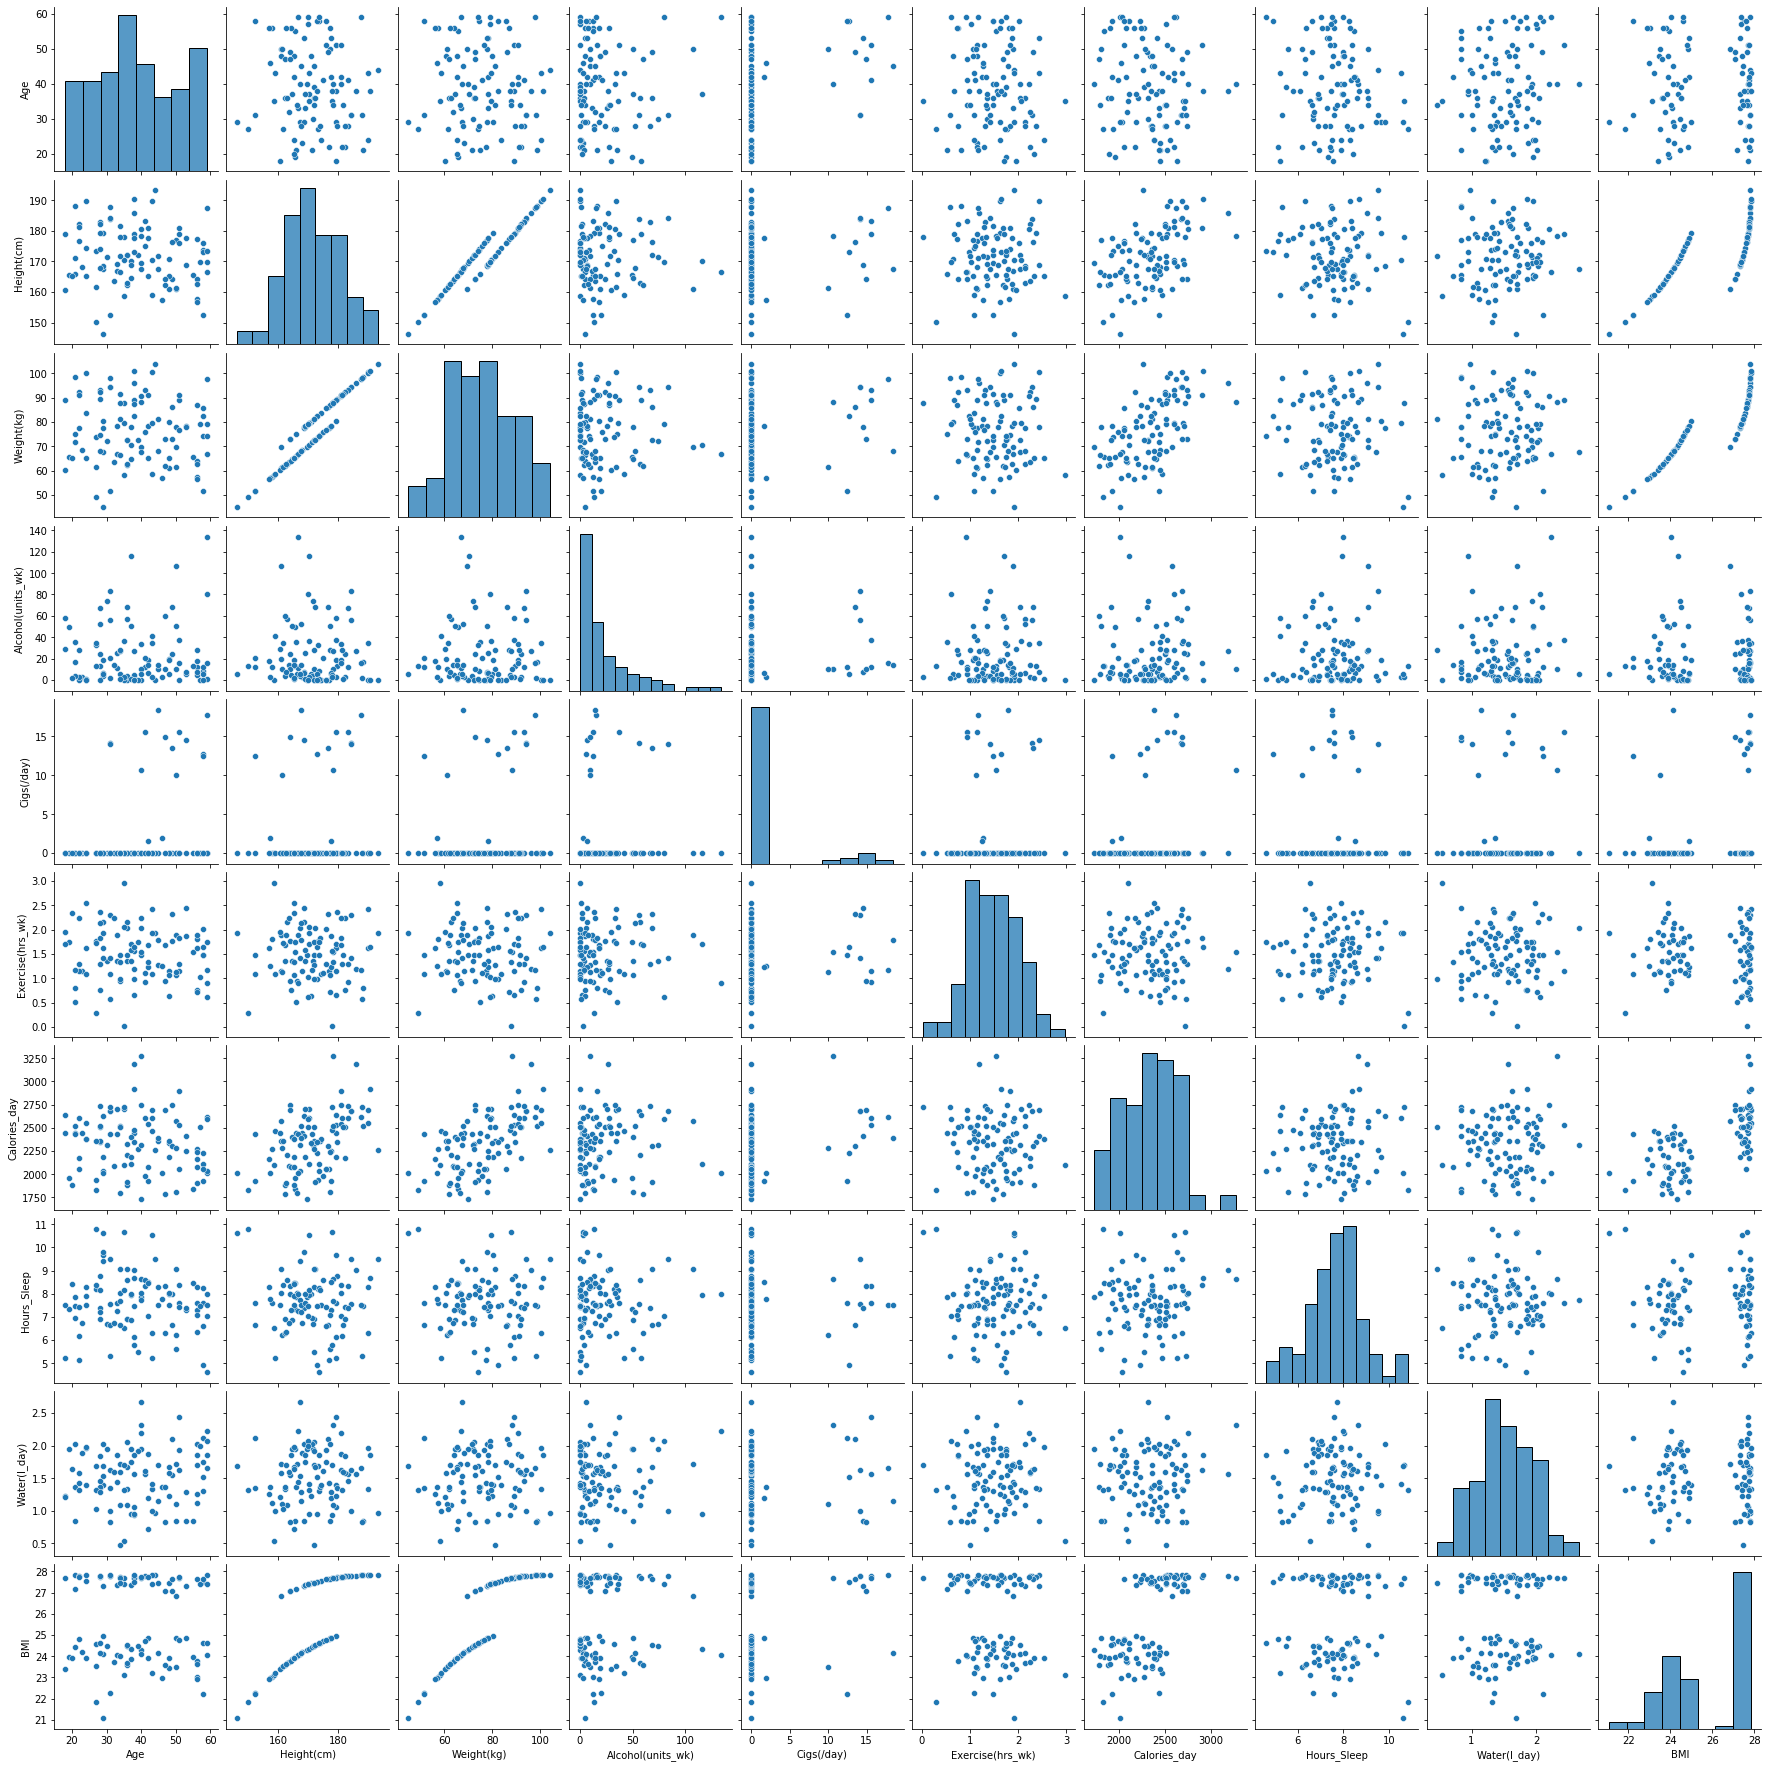

In [51]:
sns.pairplot(data=df)

We can see a definite relationship between height and weight as expected, I have not been able to break out a 'hue' on when calling pairplot form some odd reason. 

### Conclusions




Firstly, I found this project very intersting, however my own ecexution I feel lacks some polish. Originally I had envisioned and additional column with a "Health score" dependent on the rest of the columns, a pretty nonsense score and completely fictional. However the score would be returned as a result after training a predictor and requestng user input in the form of the survey. I never quite got there.

I think the alcohol units consumed on the gamma function is all kind of wrong, however, I believe the probability distribution is one of a few correct ones to use.

I feel like I could've automated so much more of creating the dataframe, utilising if __name__ == '__main__', but I also never really got there.
